<a href="https://colab.research.google.com/github/nyoons/ESAA/blob/main/movies_train_YB_2%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

우선, 한글이 깨지는 현상을 방지하기 위한 작업을 진행하고 필요한 모듈을 불러옵니다.

In [ ]:
#matplotlib 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

이번 프로젝트에서 분석할 데이터에 대해 간단히 살펴보겠습니다.

# **movies_train**
2010년대 한국에서 개봉한 한국영화 600개에 대한 감독, 이름, 상영등급, 관객수 등의 정보가 담긴 데이터


---

**변수 이름 및 설명**

- **title**: 영화의 제목
- **distributor**: 배급사
- **gerne**: 장르
- **release_time**: 개봉일
- **time**: 상영시간(분)
- **screening_rat**: 상영등급
- **director**: 감독이름
- **dir_prev_bfnum**: 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- **dir_prev_num**: 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
- **num_staff**: 스텝수
- **num_actor**: 주연배우수
- **box_off_num**: 관객수

In [ ]:
movies=pd.read_csv('movies_train.csv')
movies.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
movies.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


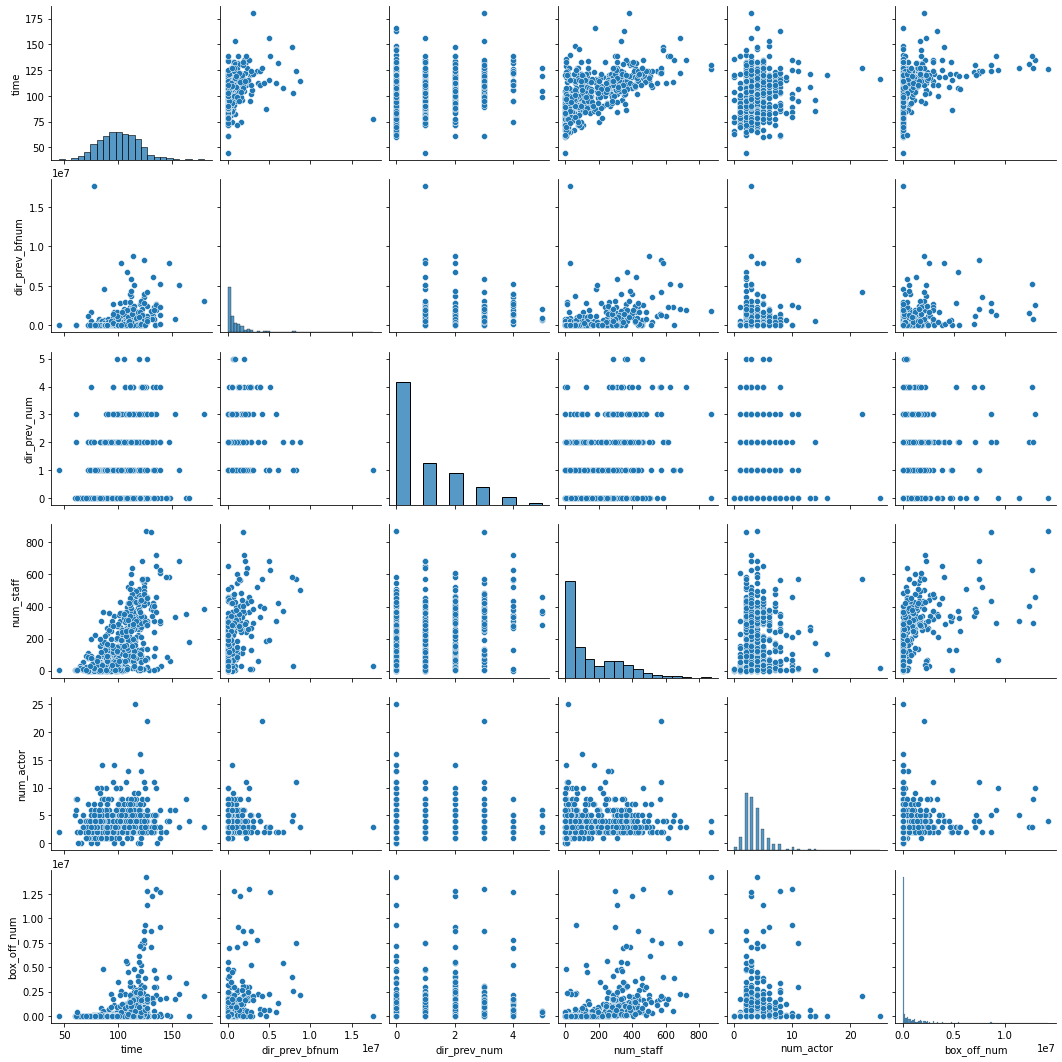

In [ ]:
sns.pairplot(movies)

다음으로는 저희 조가 설정한 가설을 검증해보겠습니다.
<br/>가설은 1. 흥행 정도 2. 장르 3. 개봉일 4. 감독의 이전 활동 크게 네 가지 카테고리로 나누어 설정했습니다.

<br/>먼저 관객수로 나타나는 흥행 정도에 영향을 미치는 요소에 대해 가설을 세우고, 분석한 결과를 보여드리겠습니다.

## **1) 흥행 정도 (관객 수)에 영향을 미치는 요소 분석**


---


**1-1) screening_rat / box_off_num: 상영등급와 관객 수의 관계**

(상영 등급에 따라 관객 수에 변화가 있을 것이다)


상영등급을 영어로 바꿔주어야 언어가 깨지지 않음

- 전체 관람가: G-rated
- 12세 관람가: PG 12
- 15세 관람가: PG 15
- 청소년 관람불가: PG 18

**1-2) release_time / box_off_num: 개봉일과 관객 수의 관계**

(개봉일에 따라 흥행 정도에 차이가 있을 것이다) 영화값 인상과 관계?

**1-3) time / box_off_num: 상영시간과 관객 수의 관계**

(상영 시간에 따라 흥행 정도에 차이가 있을 것이다)

**1-4) num_staff / box_off_num: 스텝 수와 관객 수의 관계**

(스텝 수를 많이 가진 영화가 더욱 흥행했을 것이다)

**1-5) title / box_off_num: 영화의 제목과 관객 수의 관계**

(영화의 제목 길이에 따라 흥행 정도에 변화가 있을 것이다)

**1-6) distributor / box_off_num**

(대기업 계열사 배급사인지 아닌지에 따라 흥행 정도에 차이가 있을 것이다)

그 다음으로, 장르에 따른 변화에 대해 가설을 세우고, 분석한 결과를 보여드리겠습니다.

> 들여쓴 블록



## **2) 장르에 따른 변화 분석**

---

**2-1) screening_rat / gerne: 장르에 따른 상영등급의 분포**

(장르에 따라 상영 등급에 변화가 있을 것이다)

**2-2) time / genre: 장르와 상영시간 간의 관계**

(장르에 따라 상영 시간에 변화가 있을 것이다)


**2-3) num_actor / genre: 장르와 주연배우수 간의 관계**

(장르에 따라 주연배우 수에 차이가 있을 것이다)

**2-4) num_staff / genre: 장르와 스텝수 간의 관계**

장르에 따라 스텝 수에 차이가 있을 것이다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_

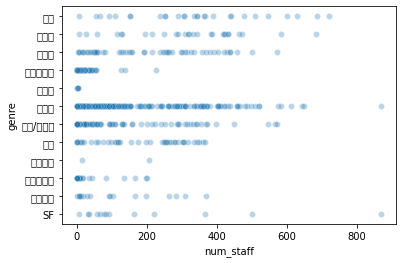

In [ ]:
fig=plt.figure()
axes=fig.add_subplot(1,1,1)

axes=sns.scatterplot(x='num_staff', y='genre', data=movies, alpha=0.3)

한 눈에 들어오진 않지만 ~ 장르에 많으 스탭이 투입되었고  장르에는 상대적으로 적게 투입되었다. 스탭 수의 평균치로도 비교해보자.

<Figure size 432x288 with 0 Axes>

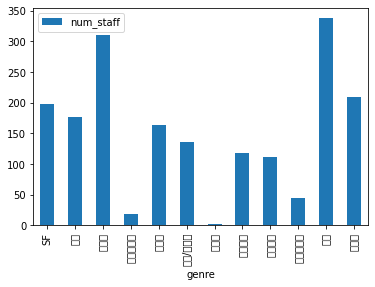

In [ ]:
staff_mean=movies[['genre','num_staff']].groupby('genre').mean()

plt.figure()
staff_mean.plot(kind = 'bar',)

**2-5) distributor / genre**

배급사에 따라 다루는 장르에 차이가 있을 것이다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_

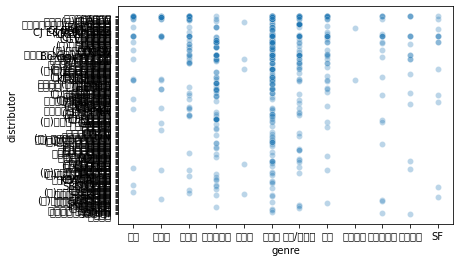

In [ ]:
fig=plt.figure()
axes=fig.add_subplot(1,1,1)

axes=sns.scatterplot(x='genre', y='distributor', data=movies, alpha=0.3)

In [ ]:
movies['distributor'].value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

배급사 종류가 169개로 너무 많아 그래프가 눈에 들어오지 않는다. 영화 제작 경험이 적은 배급사는 분석할 의미가 없으므로 많이 제작해 본 제작사 20개만 추출해 따로 분석해보자.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47592 missing from current font.
  font.set_

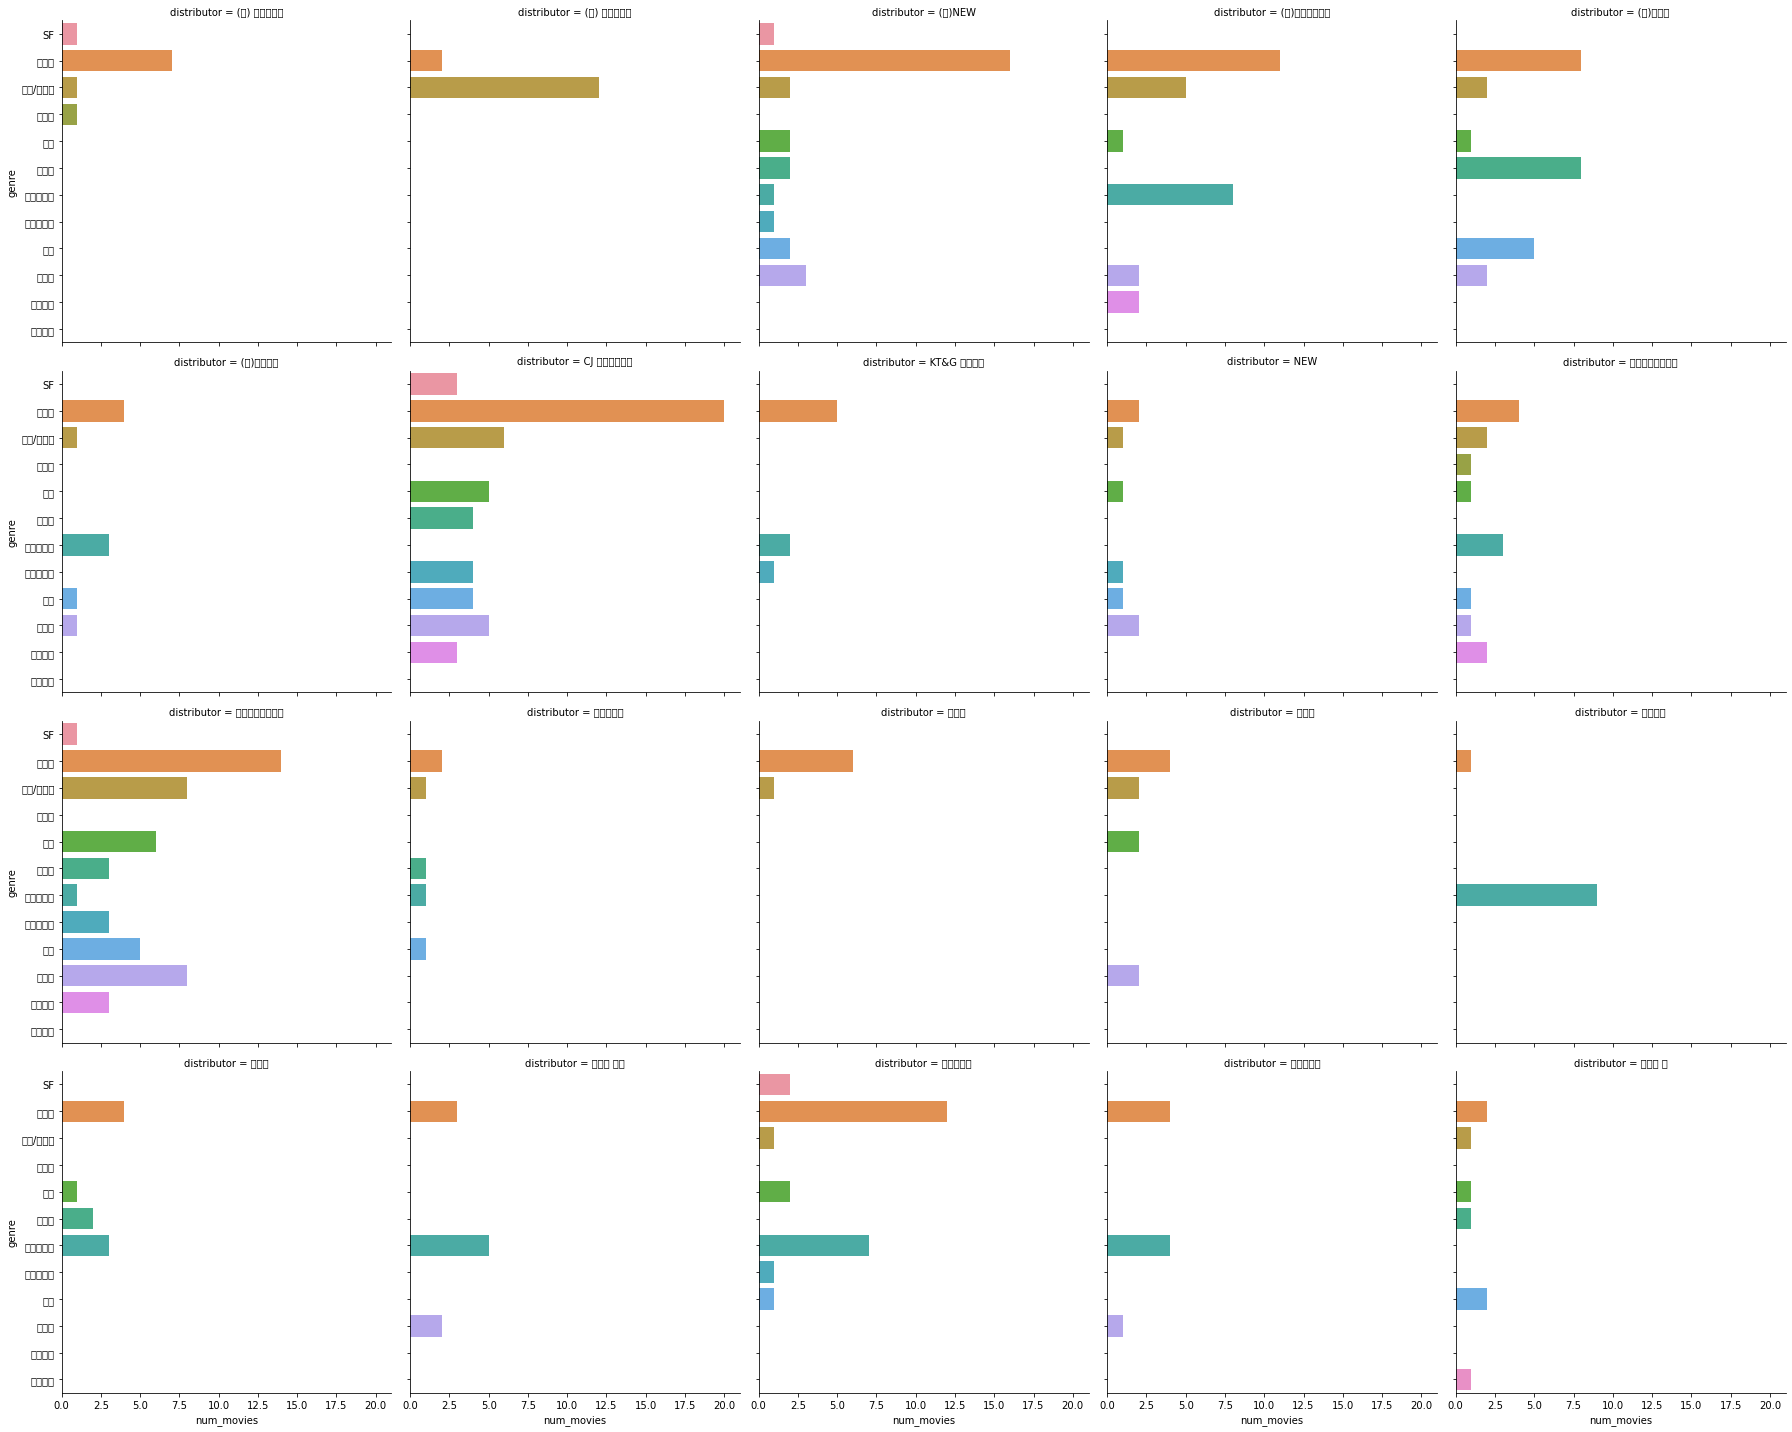

In [ ]:
distributor_20 = movies['distributor'].value_counts().head(20)

movies2_5 = movies.groupby(['distributor', 'genre'])['title'].count().reset_index()
movies2_5.columns = ['distributor', 'genre', 'num_movies']

movies_dist = movies2_5[movies2_5['distributor'].isin(distributor_20.index)].copy()

ax = sns.catplot(data=movies_dist, x='num_movies', y='genre',
            kind='bar', col='distributor', col_wrap=5)

확실히 제작 경험이 많은 000제작사는 다양한 장르의 영화를 제작해봄. 나머지는 000000

세 번째로는 개봉일에 따른 변화에 대해 가설을 세우고, 분석한 결과를 보여드리겠습니다.

## **3) 개봉일에 따른 변화 분석**

**3-1) release_time / title: 개봉 일과 영화 제목 길이 간의 관계**

최근에 개봉한 영화일수록 영화 제목의 길이가 짧을 것이다.


In [ ]:
movies1_3=movies[['release_time', 'title']]
movies1_3['release_time']=pd.to_numeric(movies1_3['release_time'].str[:4])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
movies1_3['title_len']=movies1_3['title'].apply(lambda x:len(x))
movies1_3.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,release_time,title,title_len
0,2012,개들의 전쟁,6
1,2015,내부자들,4
2,2013,은밀하게 위대하게,9


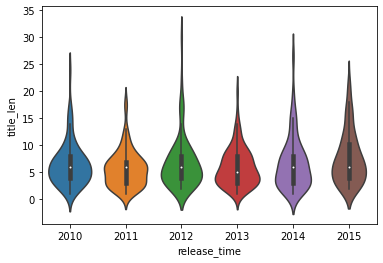

In [ ]:
fig=plt.figure()
axes=fig.add_subplot(1,1,1)

axes=sns.violinplot(x='release_time', y='title_len', data=movies1_3)

눈에 띄는 경향은 딱히 없어 보입니다.

마지막으로 감독의 이전 경력과 다른 변수들이 연관이 있는지에 대한 가설을 세우고, 분석한 결과를 보여드리겠습니다.

## **4) 신인 감독 vs 경력 감독 분석**

---

**4-1) director / dir_prev_num / release_time**

(첫 작품인 신인 감독의 수의 변화 추이)


**4-2) director / dir_prev_num/ box_of_num: 제작에 참여한 영화의 개수와 관객 수의 관계**

(제작 경험이 있는지에 따라 흥행 정도에 차이가 있을 것이다)


**4-3) director / dir_prev_bfnum / box_of_num: 전 영화의 평균 관객 수와 관객 수의 관계** 

(흥행한 영화를 만든 경험이 많은 감독의 영화가 더욱 흥행했 것이다 - 경험이 있는 경우 한정)
